# Download the BGC-Argo data / BGCアルゴデータをダウンロードする

### Import the module required / 必要なモジュールを読み込む
- Here, only `pandas` is required / ここでは`pandas`のみ必要

In [1]:
import pandas as pd

<a id="jump_bgc-argo"></a>
### Retrieve the latest Argo index from the website / 最新のアルゴデータインデックス(カタログ)を読み込む
- This index can also be viewed from your browser / カタログはブラウザからも閲覧できる: https://data-argo.ifremer.fr/argo_synthetic-profile_index.txt
- Note this process can take some time (for a minute or so) as the index is relatively large (MBs) and the server can be slow / カタログの容量が大きいこととサーバーが遅い時があるため、カタログを読み込むのに１分ほど時間を要することがある。
- `skiprows = 8`: Ignore the first 8 rows which are irrelevant / カタログの最初の８行は必要ないので無視する

In [2]:
data = pd.read_csv('https://data-argo.ifremer.fr/argo_synthetic-profile_index.txt',skiprows=8)
data

,file,date,latitude,longitude,ocean,profiler_type,institution,parameters,parameter_data_mode,date_update
0,aoml/1900722/profiles/SD1900722_001.nc,2.006102e+13,-40.316,73.389,I,846,AO,PRES TEMP PSAL DOXY,DDDD,20220628080801
1,aoml/1900722/profiles/SD1900722_002.nc,2.006110e+13,-40.390,73.528,I,846,AO,PRES TEMP PSAL DOXY,DDDD,20220628080813
2,aoml/1900722/profiles/SD1900722_003.nc,2.006111e+13,-40.455,73.335,I,846,AO,PRES TEMP PSAL DOXY,DDDD,20220628080826
3,aoml/1900722/profiles/SD1900722_004.nc,2.006112e+13,-40.134,73.080,I,846,AO,PRES TEMP PSAL DOXY,DDDD,20220628080839
4,aoml/1900722/profiles/SD1900722_005.nc,2.006120e+13,-39.641,73.158,I,846,AO,PRES TEMP PSAL DOXY,DDDD,20220628080852
...,...,...,...,...,...,...,...,...,...,...
315505,meds/4902688/profiles/SR4902688_022D.nc,2.024061e+13,NaN,NaN,NaN,834,ME,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRRRRRRAR,20240613235819
315506,meds/4902688/profiles/SR4902688_023.nc,2.024061e+13,57.387,-49.054,A,834,ME,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRRRRRRAR,20240614235546
315507,meds/4902688/profiles/SR4902688_023D.nc,2.024061e+13,NaN,NaN,NaN,834,ME,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRRRRRRAR,20240614235535
315508,meds/4902688/profiles/SR4902688_024.nc,2.024062e+13,57.479,-48.146,A,834,ME,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,RRRRRRRRAR,20240620235645


### Define your study area and period / 研究対象とする領域と期間を指定する
For the area, specify the four corners of the rectangular area in longitudes (0 to 360 degs) and latitudes (-90 to 90 degs) / 領域は、四角形の四隅の経度(0〜360)と緯度(-90〜90)を指定する
- lon0: the western edge of the box
- lon1: the eastern edge of the box
- lat0: the southern edge of the box
- lat1: the western edge of the box

For the period, specify the first and last dates in the yyyymmdd format / 期間は、最初と最後の日付をyyyymmddフォーマットで指定する
- date0: the first date
- date1: the last date

In [60]:
lon0 = 0
lon1 = 360
lat0 = -90
lat1 = 90
date0 = 20230101
date1 = 20231231

### Create an index based on your study area and period / 研究対象領域と期間に該当するデータのみを含めたカタログを作成する
- note: define this even if you want for the whole region. this filtering helps remove the data with NaN values for dates.
- For example for global coverage;
datasub = data[(data['longitude'] > 0) & (data['longitude'] < 360) & (data['latitude'] > -90) & (data['latitude'] < 90) & (data['date']>0)]

In [61]:
#extract the dataset based on lon, lat, and variable (chl). Date has a weird format so extract first then postprocess dates
datasub = data[(data['longitude'] >= lon0) & (data['longitude'] <= lon1) & (data['latitude'] >= lat0) &
               (data['latitude'] <= lat1) & (data['date'] >= 0)]

full_sensors = ['DOXY','CHLA','DOWNWELLING_PAR','BBP700','NITRATE','PH_IN_SITU_TOTAL']

for i in range(len(full_sensors)):
    datasub = datasub[datasub['parameters'].str.contains(full_sensors[i])]

#modify the date format to be yyyymmdd
datestr = [str(num) for num in datasub['date']]
datestr = [num[0:8] for num in datestr]
dateint = [int(num) for num in datestr]
datasub.loc[:,'date'] = dateint
#refine the dataset based on the selected period
datasub = datasub[(datasub['date'].values >= date0) & (datasub['date'].values <= date1)]
datasub

,file,date,latitude,longitude,ocean,profiler_type,institution,parameters,parameter_data_mode,date_update
110119,aoml/5907055/profiles/SD5907055_001.nc,20230904.0,-33.021,40.503,I,846,AO,PRES TEMP PSAL DOXY CHLA BBP700 PH_IN_SITU_TOT...,DDDRAARRRRRR,20240418025058
110120,aoml/5907055/profiles/SD5907055_002.nc,20230914.0,-33.637,41.416,I,846,AO,PRES TEMP PSAL DOXY CHLA BBP700 PH_IN_SITU_TOT...,DDDRAARRRRRR,20240418025107
110121,aoml/5907055/profiles/SD5907055_003.nc,20230924.0,-33.947,41.986,I,846,AO,PRES TEMP PSAL DOXY CHLA BBP700 PH_IN_SITU_TOT...,DDDRAARRRRRR,20240418025116
110122,aoml/5907055/profiles/SD5907055_004.nc,20231005.0,-33.947,42.729,I,846,AO,PRES TEMP PSAL DOXY CHLA BBP700 PH_IN_SITU_TOT...,DDDRAARRRRRR,20240418025125
110123,aoml/5907055/profiles/SD5907055_005.nc,20231015.0,-34.026,43.137,I,846,AO,PRES TEMP PSAL DOXY CHLA BBP700 PH_IN_SITU_TOT...,DDDRAARRRRRR,20240418025133
...,...,...,...,...,...,...,...,...,...,...
270486,csiro/7900947/profiles/SR7900947_1035.nc,20231117.0,-66.671,15.898,A,836,CS,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,AAAARRRRRRAAA,20240510142251
270487,csiro/7900947/profiles/SR7900947_1036.nc,20231127.0,-66.710,13.739,A,836,CS,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,AAAARRRRRRAAA,20240510142300
270488,csiro/7900947/profiles/SR7900947_1037.nc,20231207.0,-66.749,11.581,A,836,CS,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,AAAARRRRRRAAA,20240510142310
270489,csiro/7900947/profiles/SR7900947_1038.nc,20231217.0,-66.869,11.177,A,836,CS,PRES TEMP PSAL DOXY DOWN_IRRADIANCE380 DOWN_IR...,AAAARRRRRRAAA,20240510142319


In [62]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cft 
from datetime import datetime, timedelta


processing 0 / 676
processing 1 / 676
processing 2 / 676
processing 3 / 676
processing 4 / 676
processing 5 / 676
processing 6 / 676
processing 7 / 676
processing 8 / 676
processing 9 / 676
processing 10 / 676
processing 11 / 676
processing 12 / 676
processing 13 / 676
processing 14 / 676
processing 15 / 676
processing 16 / 676
processing 17 / 676
processing 18 / 676
processing 19 / 676
processing 20 / 676
processing 21 / 676
processing 22 / 676
processing 23 / 676
processing 24 / 676
processing 25 / 676
processing 26 / 676
processing 27 / 676
processing 28 / 676
processing 29 / 676
processing 30 / 676
processing 31 / 676
processing 32 / 676
processing 33 / 676
processing 34 / 676
processing 35 / 676
processing 36 / 676
processing 37 / 676
processing 38 / 676
processing 39 / 676
processing 40 / 676
processing 41 / 676
processing 42 / 676
processing 43 / 676
processing 44 / 676
processing 45 / 676
processing 46 / 676
processing 47 / 676
processing 48 / 676
processing 49 / 676
processing

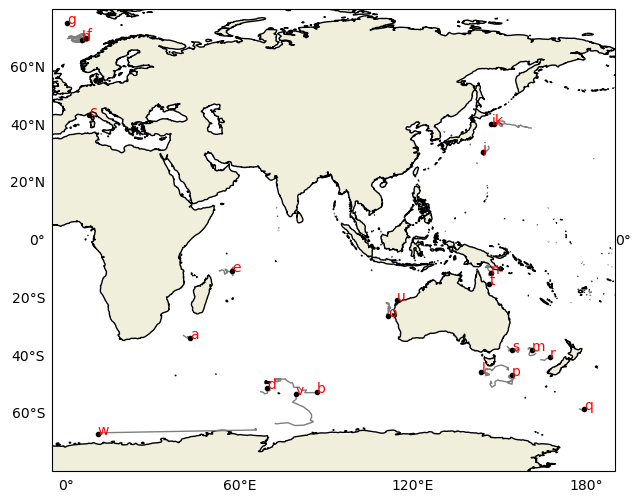

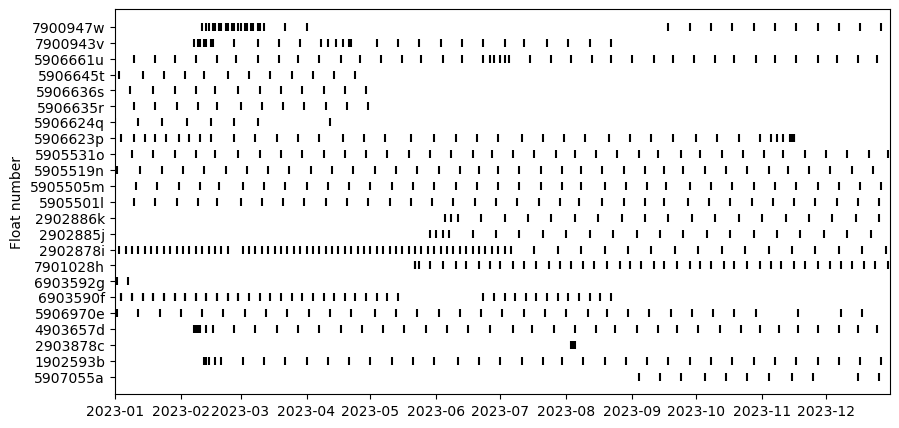

In [67]:
abcs = 'abcdefghijklmnopqrstuvwxyz'
fig = plt.figure(figsize=(8,6))
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(1,1,1)

ax1 = fig.add_subplot(1,1,1,projection= ccrs.PlateCarree(central_longitude=90))
ax1.add_feature(cft.LAND)
ax1.coastlines(resolution='50m')
ax1.set_extent([-5, 190, -80, 80], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
gl.top_labels=False
gl.right_labels=False

floatid_cur = 0
floatnum = []
floatsta = []
floatend = []
floatlon = []
floatlat = []
floatdate = []
abci = 0
#loop over each profile
for i in range(datasub.shape[0]):
    print('processing',i,'/',datasub.shape[0])

    #float id: obtain from the file path split by slash (/) and grab the second index (after the first and second slashes)
    floatid = datasub['file'].values[i].split('/')[1]
    #in the first iteration, save the id and start date
    if i == 0: 
        floatnum.append(floatid)
        floatsta.append(datasub['date'].values[i])
        floatlon.append(datasub['longitude'].values[i])
        floatlat.append(datasub['latitude'].values[i]) 
        floatdate.append(datetime.strptime(str(int(datasub['date'].values[i])),'%Y%m%d'))
        floatstatus.append(datasub['file'].values[i].split('/')[-1][1])
        floatid_cur = floatid
    #for the rest of the iteration
    else:
        #accumulate lon,lat if still the same float
        if floatid == floatid_cur:
            floatlon.append(datasub['longitude'].values[i])
            floatlat.append(datasub['latitude'].values[i])
            floatdate.append(datetime.strptime(str(int(datasub['date'].values[i])),'%Y%m%d'))
            floatstatus.append(datasub['file'].values[i].split('/')[-1][1])
        #if it is a new float, plot the results of the previous float
        else:
            ax1.plot(floatlon,floatlat,color='tab:gray',transform=ccrs.PlateCarree(),zorder=3,lw=1)
            ax1.scatter(floatlon[-1],floatlat[-1],color='k',marker='.',transform=ccrs.PlateCarree(),zorder=4,lw=1)
            ax1.text(floatlon[-1],floatlat[-1],abcs[abci],color='r',transform=ccrs.PlateCarree(),zorder=5)
            abci += 1
            for k in range(np.size(floatdate)):
                ax2.scatter(floatdate[k],np.size(floatnum)-1,color='k',marker='|')
            floatlon = []
            floatlat = []
            floatdate = []
            floatstatus = []
            floatend.append(datasub['date'].values[i-1])
            floatsta.append(datasub['date'].values[i])
            floatid_cur = floatid
            floatnum.append(floatid)
            floatlon.append(datasub['longitude'].values[i])
            floatlat.append(datasub['latitude'].values[i])
            floatdate.append(datetime.strptime(str(int(datasub['date'].values[i])),'%Y%m%d'))
            floatstatus.append(datasub['file'].values[i].split('/')[-1][1])

#plot the remaining float
ax1.plot(floatlon,floatlat,color='tab:gray',transform=ccrs.PlateCarree(),zorder=3,lw=1)
ax1.scatter(floatlon[-1],floatlat[-1],color='k',marker='.',transform=ccrs.PlateCarree(),zorder=4,lw=1)
ax1.text(floatlon[-1],floatlat[-1],abcs[abci],color='r',transform=ccrs.PlateCarree(),zorder=5)
floatend.append(datasub['date'].values[i])
for k in range(np.size(floatdate)):
    ax2.scatter(floatdate[k],np.size(floatnum)-1,color='k',marker='|')

fig.savefig('./map.png',dpi=300,bbox_inches='tight')
print('number of floats:',np.size(floatnum))

daimei = []
for i in range(len(floatnum)):
    daimei.append(floatnum[i]+abcs[i])
ax2.set_yticks(range(np.size(floatnum)), daimei)
ax2.set_xlim(datetime.strptime(str(date0),'%Y%m%d'),datetime.strptime(str(date1),'%Y%m%d'))
ax2.set_ylabel('Float number')
fig2.savefig('./timeline.png',dpi=300,bbox_inches='tight')

### Download the synthetic profiles / 該当するプロファイルを全てダウンロードする
- `-N` means to download only if the file has been updated / `-N`はファイルが更新されている場合のみダウンロードする（再実行する時に便利）

In [41]:
for i in range(datasub.shape[0]):
    url = 'ftp://ftp.ifremer.fr/ifremer/argo/dac/'+datasub['file'].values[i]
    !wget -N {url} -P data-argo

--2024-06-20 09:43:51--  ftp://ftp.ifremer.fr/ifremer/argo/dac/aoml/5904857/profiles/SD5904857_110.nc
           => 'data-argo/.listing'
Resolving ftp.ifremer.fr (ftp.ifremer.fr)... 134.246.142.21
Connecting to ftp.ifremer.fr (ftp.ifremer.fr)|134.246.142.21|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /ifremer/argo/dac/aoml/5904857/profiles ... done.
==> PASV ... done.    ==> LIST ... done.

.listing                [    <=>             ]  34.86K  38.3KB/s    in 0.9s    

2024-06-20 09:43:55 (38.3 KB/s) - 'data-argo/.listing' saved [35700]

Removed 'data-argo/.listing'.
--2024-06-20 09:43:55--  ftp://ftp.ifremer.fr/ifremer/argo/dac/aoml/5904857/profiles/SD5904857_110.nc
           => 'data-argo/SD5904857_110.nc'
==> CWD not required.
==> PASV ... done.    ==> RETR SD5904857_110.nc ... done.
Length: 175584 (171K)

SD5904857_110.nc    100%[===================>] 171.47K  79.3KB/s    in 2.2s    

2024-06-2

### That's it! You should have the profiles in your `echoes-ss2024/data-argo` directory / おしまい！`echoes-ss2024/data-argo`というディレクトリにプロファイルが全て保存されているはず